In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sna
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Practice DS/ECOMM DATA.xlsx')

In [ ]:
df.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,933.57,762.1845,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.7650,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,915.49,919.9710,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,910.16,-96.5400,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,903.04,311.5200,Critical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ROW ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Postal Code     9994 non-null   float64       
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

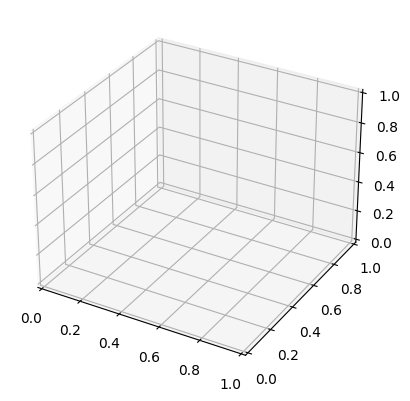

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [ ]:
s=ax.scatter(df['Sales'],df['Shipping Cost'],df['Profit'],c='r',marker='o')
ax.set_xlabel('Sales')
ax.set_ylabel('Shipping Cost')
ax.set_zlabel('Profit')
plt.show()

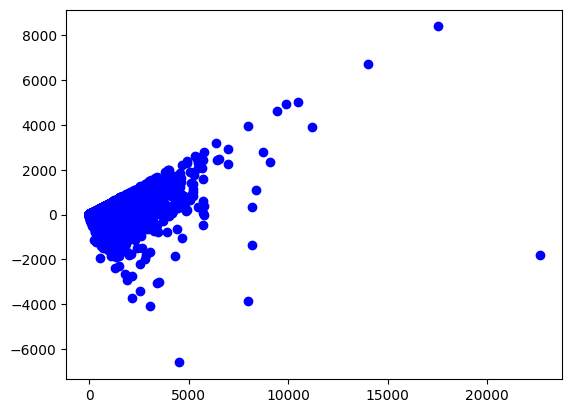

In [ ]:
plt.scatter(df['Sales'],df['Profit'],c='b')

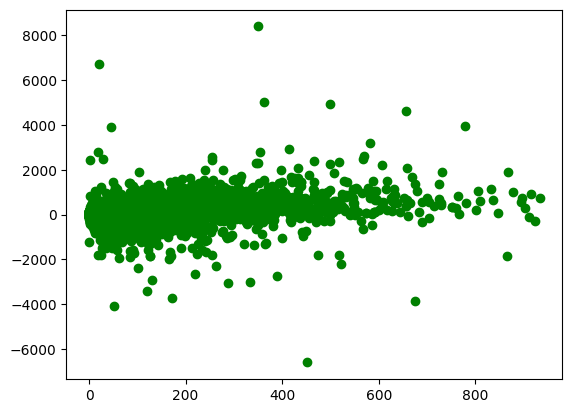

In [ ]:
plt.scatter(df['Shipping Cost'],df['Profit'],c='g')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

K-Means for Sales and Profit

In [ ]:
sse = []
k_rng = range(1,10)
for n in k_rng:
    km=KMeans(n_clusters=n)
    km.fit(df[['Sales','Profit']])
    sse.append(km.inertia_)

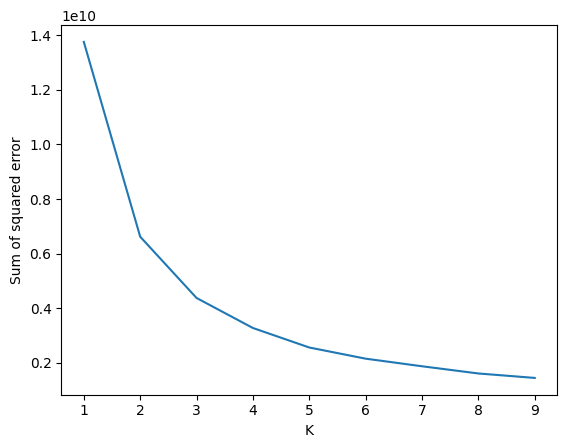

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['Sales','Profit']])
df[['Sales','Profit']]=scaler.transform(df[['Sales','Profit']])

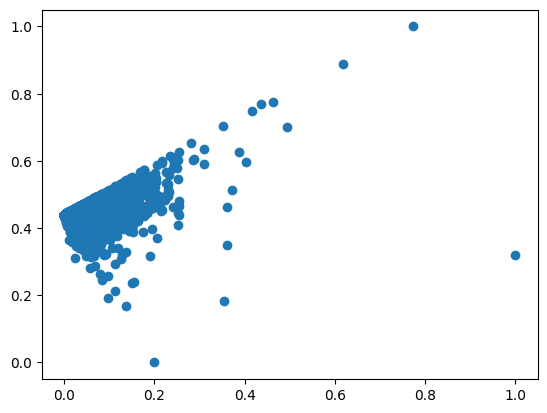

In [ ]:
plt.scatter(df['Sales'],df['Profit'])

In [ ]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Sales','Profit']])
y_predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predict
df.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,cluster
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,0.102006,7,0.0,933.57,0.490812,Critical,2
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",0.163837,9,0.1,923.63,0.420749,Critical,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",0.228586,9,0.1,915.49,0.501331,Medium,2
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",0.127753,5,0.1,910.16,0.433564,Medium,2
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",0.125122,8,0.0,903.04,0.460768,Critical,2


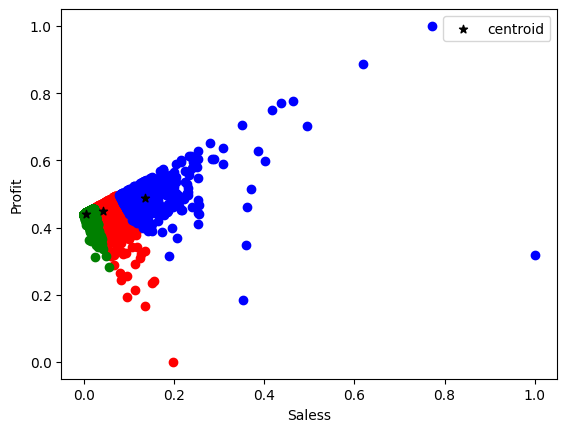

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Sales,df1['Profit'], c='r')
plt.scatter(df2.Sales,df2['Profit'], c='g')
plt.scatter(df3.Sales,df3['Profit'], c='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*',label='centroid')
plt.xlabel('Saless')
plt.ylabel('Profit')
plt.legend()

K-Means of Shipping Cost and Profit

In [ ]:
ss2=[]
k_rng2=range(1,10)
for n in range(1,10):
    km2=KMeans(n_clusters=n)
    km2.fit(df[["Shipping Cost","Profit"]])
    ss2.append(km2.inertia_)

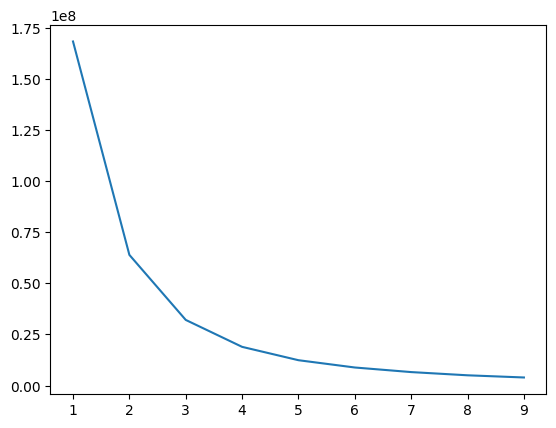

In [ ]:
plt.plot(k_rng2,ss2)

In [ ]:
scaler.fit(df[['Shipping Cost','Profit']])
df[['Shipping Cost','Profit']] =scaler.transform(df[['Shipping Cost','Profit']])

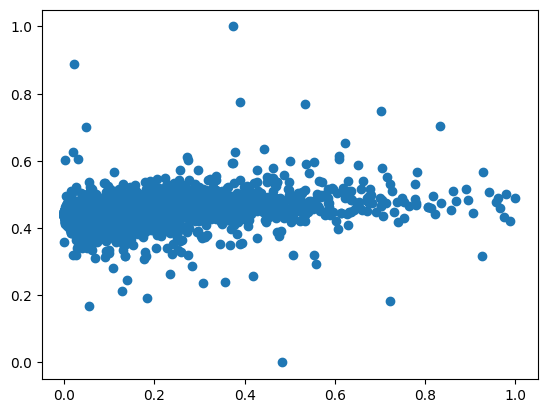

In [ ]:
plt.scatter(df['Shipping Cost'],df['Profit'])

In [ ]:
km2=KMeans(n_clusters=3)
y_predict2=km2.fit_predict(df[['Shipping Cost','Profit']])
y_predict2

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predict2

In [ ]:
df.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,cluster
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,0.102006,7,0.0,1.000000,0.490812,Critical,1
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",0.163837,9,0.1,0.989353,0.420749,Critical,1
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",0.228586,9,0.1,0.980633,0.501331,Medium,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",0.127753,5,0.1,0.974924,0.433564,Medium,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",0.125122,8,0.0,0.967298,0.460768,Critical,1


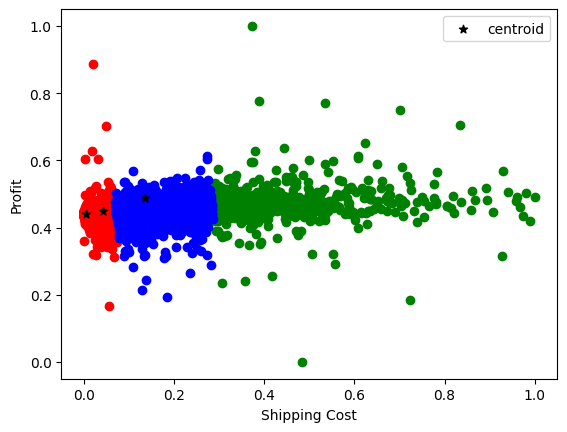

In [ ]:
df1=df[df.cluster==0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1["Shipping Cost"], df1['Profit'], c='r')
plt.scatter(df2["Shipping Cost"], df2['Profit'], c='g')
plt.scatter(df3["Shipping Cost"], df3['Profit'], c='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*',label='centroid')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.legend()

K-Means for 3 columns

In [ ]:
df.head()

,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority,cluster
0,26341,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,0.102006,7,0.0,1.000000,0.490812,Critical,1
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",0.163837,9,0.1,0.989353,0.420749,Critical,1
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",0.228586,9,0.1,0.980633,0.501331,Medium,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",0.127753,5,0.1,0.974924,0.433564,Medium,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",0.125122,8,0.0,0.967298,0.460768,Critical,1


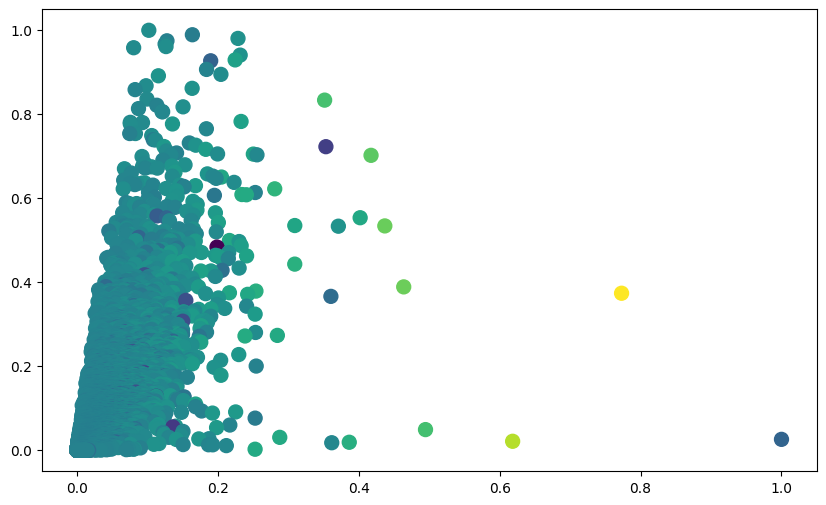

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Sales'], df['Shipping Cost'], c=df['Profit'], cmap='viridis', s=100)

In [ ]:
see2=[]
k_rng2=range(1,10)
for n in k_rng2:
    km3=KMeans(n_clusters=n)
    km3.fit(df[['Sales','Shipping Cost','Profit']])
    see2.append(km3.inertia_)

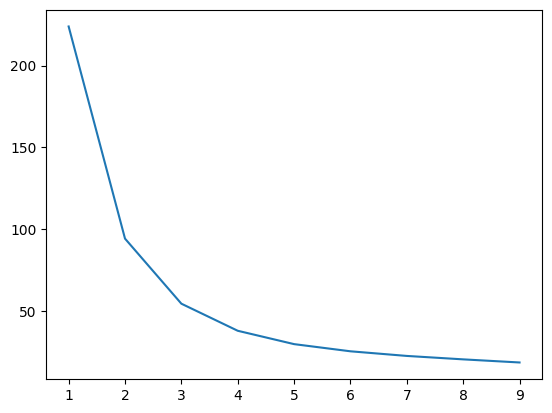

In [ ]:
plt.plot(k_rng2,see2)